### Netflix Movies & TV Shows - EDA Assignment

#### Problem Statement:  
Netflix has become one of the world’s largest entertainment platforms, offering thousands of 
movies and TV shows. Understanding its content trends can help producers, marketers, and 
strategists make data-driven decisions. In this assignment, students will perform Exploratory Data 
Analysis (EDA) on Netflix’s titles dataset to uncover trends related to genres, countries, release 
years, and content ratings

#### Dataset Link:  
[Netflix Movies and TV Shows - Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows) 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv(r'D:\SMIT AI & DS\Assignments\netflix_titles.csv')


In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
#Print the shape, column names, and info summary of the dataset  
print("Shape of the dataset:", df.shape)
print("Column names:", df.columns)
print("Info summary of the dataset:")
df.info()

Shape of the dataset: (8807, 12)
Column names: Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Info summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
#  Check for missing values and count them per column 
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [8]:
# Drop all rows where the title or type is missing
df_cleaned = df.dropna(subset=['title', 'type'])
# Display the cleaned DataFrame
print(df_cleaned.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [9]:
#  Convert the `date_added` column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')


#### EDA Questions:

• How many total movies vs TV shows are in the dataset?

• Which are the top 10 countries producing Netflix content?

• What is the most common genre on Netflix?

• Which years saw the highest number of releases?

• What is the distribution of content ratings (G, PG, PG-13, TV-MA, etc.)?

• Which directors have the most titles on

In [26]:
# total movies vs tv shows in the dataset
total_movies = df[df['type'] == 'Movie'].shape[0]
total_tv_shows = df[df['type'] == 'TV Show'].shape[0]
print("Total Movies:", total_movies)
print("Total TV Shows:", total_tv_shows)


Total Movies: 6131
Total TV Shows: 2676


In [27]:
top_countries = df['country'].value_counts().head(10)
print("Top 10 countries with the most titles:")
print(top_countries)




Top 10 countries with the most titles:
country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


In [34]:
# Most common genre for TV Shows
tv_shows = df[df['type'] == 'TV Show']
most_common_tv_genre = tv_shows['rating'].mode()[0]
print("Most common genre for TV Shows:", most_common_tv_genre)

Most common genre for TV Shows: TV-MA


In [38]:
# Which year saw the highest number of releases?

year_counts = df['release_year'].value_counts()
highest_release_year = year_counts.idxmax()
highest_release_count = year_counts.max()
print(f"The year with the highest number of releases is {highest_release_year} with {highest_release_count}")

The year with the highest number of releases is 2018 with 1147


In [30]:
# Distribution of content ratings (G, PG, PG-13, TV-MA, etc.)

rating_counts = df['listed_in'].value_counts()
print("Distribution of content ratings:")
print(rating_counts)

Distribution of content ratings:
listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
                                                   ... 
Action & Adventure, Cult Movies                       1
Action & Adventure, Comedies, Music & Musicals        1
Classic Movies, Horror Movies, Thrillers              1
Children & Family Movies, Classic Movies, Dramas      1
Cult Movies, Dramas, Thrillers                        1
Name: count, Length: 514, dtype: int64


In [35]:
# Which directors have the most titles on Netflix?
top_directors = df['director'].value_counts().head(10)
print("Top 10 directors with the most titles:")
print(top_directors)

Top 10 directors with the most titles:
director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64


#### Visualization Questions:

• Bar chart showing Movies vs TV Shows count.

• Horizontal bar chart of Top 10 countries by content count.

• Pie chart showing content type distribution by rating.

• Line plot showing number of releases per year.

• Heatmap showing country vs genre frequency.

### Bar chart for Movies vs TV Shows



C:\Users\emada\AppData\Local\Temp\ipykernel_23528\3953452793.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=sizes, palette=colors)


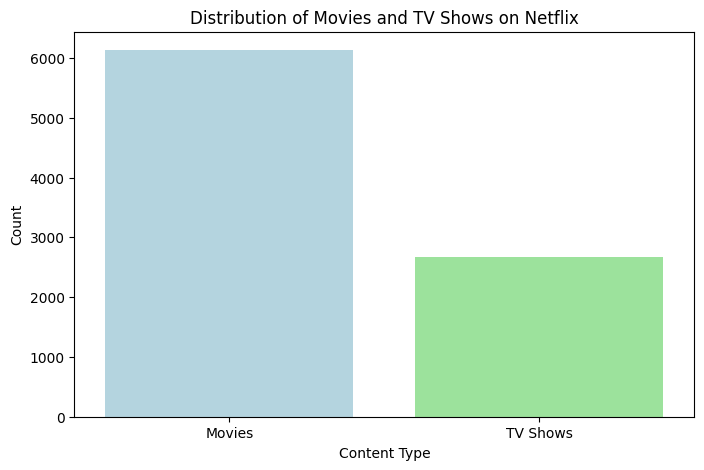

In [ ]:

labels = ['Movies', 'TV Shows']
sizes = [total_movies, total_tv_shows]
colors = ['lightblue', 'lightgreen']

plt.figure(figsize=(8, 5))
plt.title('Distribution of Movies and TV Shows on Netflix')
sns.barplot(x=labels, y=sizes, palette=colors)

plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

### Horizontal bar chart of Top 10 countries by content count.


C:\Users\emada\AppData\Local\Temp\ipykernel_23528\2549779625.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


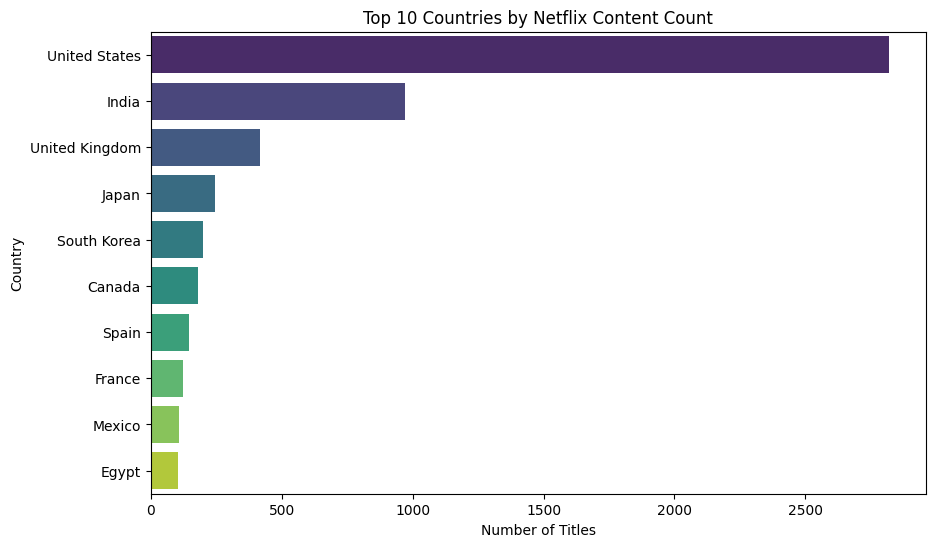

In [44]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Netflix Content Count')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

### Pie chart showing content type distribution by rating.


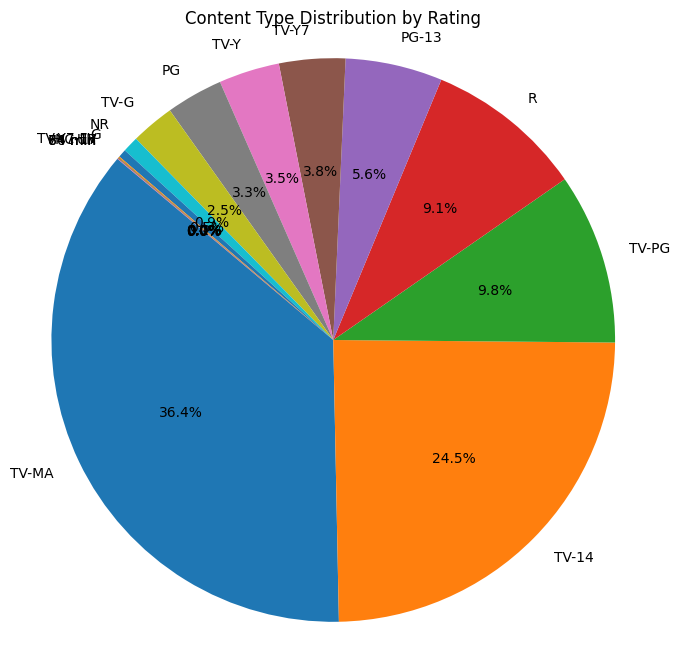

In [ ]:
rating_counts = df['rating'].value_counts()
labels = rating_counts.index
sizes = rating_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Content Type Distribution by Rating')
plt.axis('equal')
plt.show()

### Line plot showing number of releases per year.

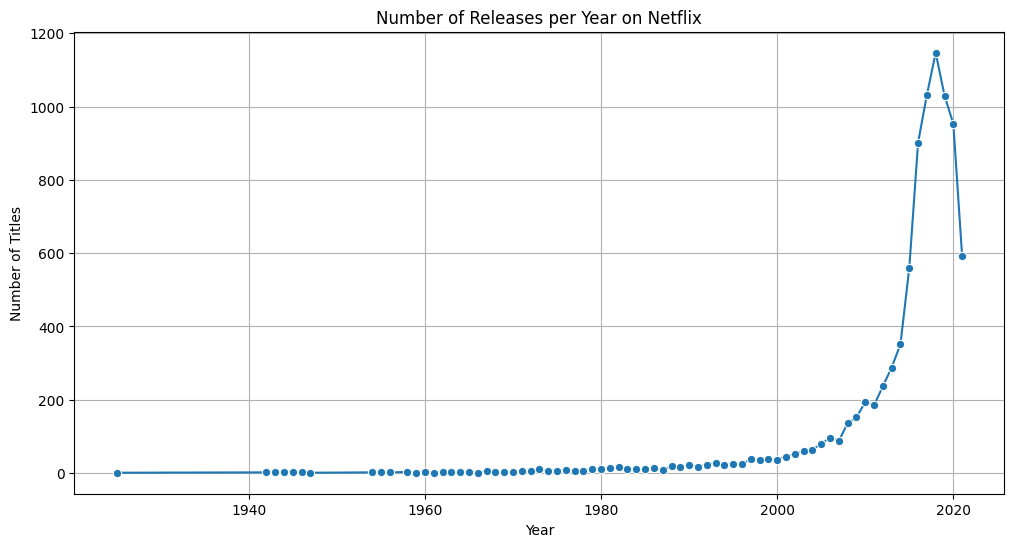

In [45]:
release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=release_counts.index, y=release_counts.values, marker='o')
plt.title('Number of Releases per Year on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

### Heatmap showing country vs genre frequency.

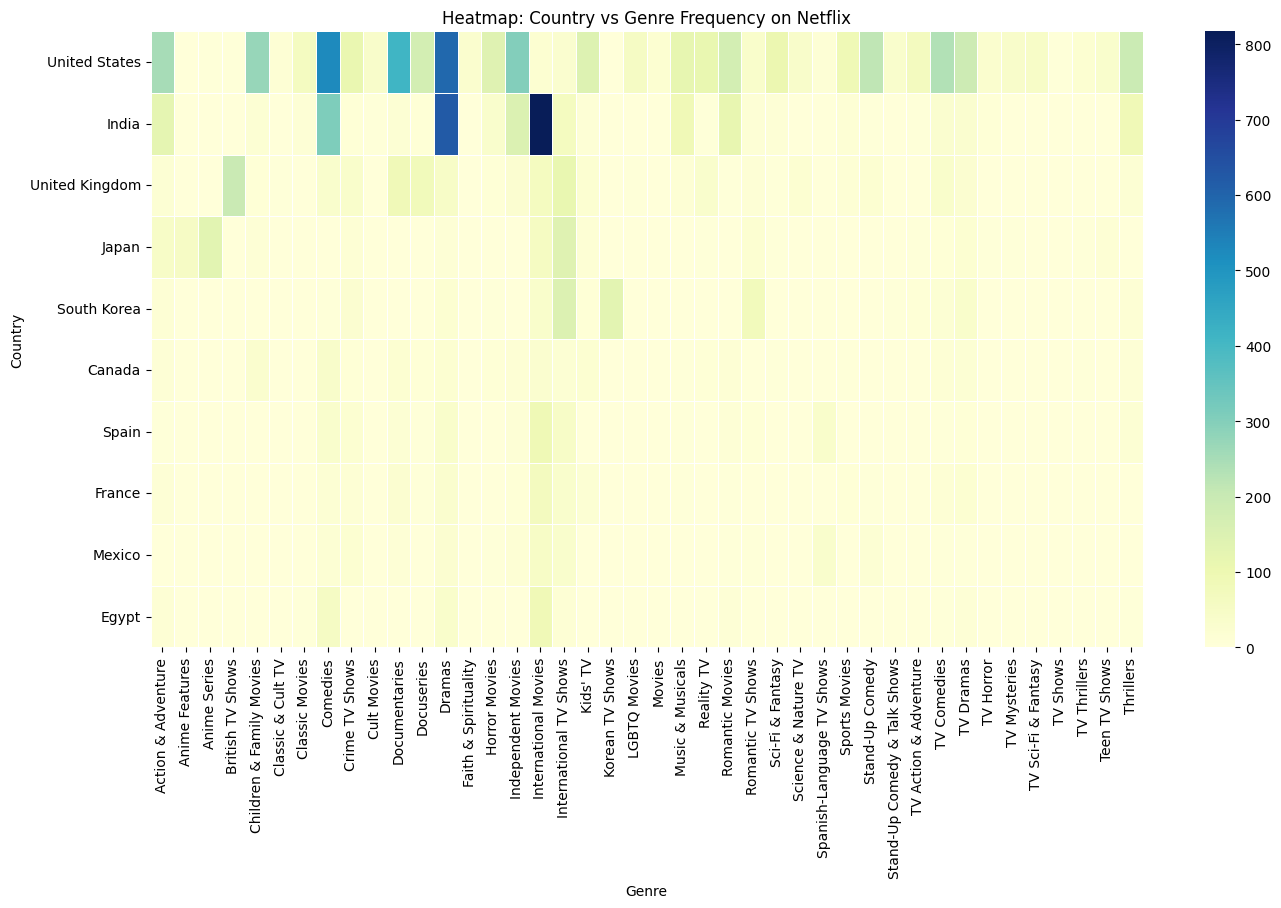

In [49]:

# Split genres and explode to get one genre per row
df_genre = df.dropna(subset=['country', 'listed_in']).copy()
df_genre['genre'] = df_genre['listed_in'].str.split(', ')
df_genre_exploded = df_genre.explode('genre')

# Create a pivot table: country vs genre counts
country_genre = pd.pivot_table(
    df_genre_exploded,
    index='country',
    columns='genre',
    values='title',
    aggfunc='count',
    fill_value=0
)

# Show only top 10 countries for clarity
top_countries = df['country'].value_counts().head(10).index
country_genre_top = country_genre.loc[top_countries]

plt.figure(figsize=(16, 8))
sns.heatmap(country_genre_top, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap: Country vs Genre Frequency on Netflix')
plt.xlabel('Genre')
plt.ylabel('Country')
plt.show()